In [1]:
import numpy as np
from sklearn.datasets import load_iris
from itertools import permutations
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [2]:
def normalizeData(X, axis=0, order=2):
    """
     Function to normalize data.

    :param axis: Order of the norm, the default is the euclidean norm (l2).
    :param order: If axis is an integer, it specifies the axis of x along which to compute the vector norms. By default normalize by 
    :return: Normalized data.

    QUESTIONS
    1. How to normalize?
    2. It is by feature or observation?
    """ 
    # Normalize data
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    # Avoid division by zero.
    l2[l2 == 0] = 1
    # X / (X.max(axis) - X.min(axis))
    return X / np.expand_dims(l2, axis)

In [3]:
def sigmoid(x):
    """
    Función de activación sigmoide
    :param x: valor a evaluar
    :return: valor evaluado
    """
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

def sigmoid_prime(x):
    """
    Derivada de la función de activación sigmoide
    :param x: valor a evaluar
    :return: valor evaluado
    """
    return sigmoid(x) * (1 - sigmoid(x))

In [4]:
def layer(inputs,weights):
    """
    Función para  crear y ejecutar capa oculta
    :param inputs: entradas a la capa
    :param n_n: numero de neuronas
    :return:
    """
    campo = np.dot(inputs, weights)

    return campo


In [5]:
datos = pd.read_csv(r"C:\Users\melis\Desktop\Joven Investigador\Clases\IA\tareasIA\DATOS.txt", header=None,sep=",")
X = datos.drop(columns=[2], axis=1).to_numpy()
y = datos.iloc[:,2].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = normalizeData(X_train, axis=0, order=2)


In [6]:
# [n, n, l1, l2,..., lL, m]
def initialize_weights(X, d,n_hiddenNeurons,  random=True):
    
    n_features = len(X[0])
    m_outputs = [1]
    n_neurons = 2*[n_features] + n_hiddenNeurons + m_outputs

    # Initiallize weights
    weights = []
    for neuron in range(1, len(n_neurons)):
      # Weight matrix dimension.
      dim = (n_neurons[neuron-1], n_neurons[neuron])
      # Random numbers in the square [-1, 1].
      if random:
        weights.append(np.random.uniform(-1, 1, dim))
      # Ones.
      else:
        weights.append(np.ones(dim))

    weights = weights
    return weights

In [7]:
learning_rate = 0.9
n_epoch = 100
n_hidden_layers = [3,3]

weights = initialize_weights(X_train,y_train,n_hidden_layers)


gradientes_k = []
energias_promedio =[]


for epoch in range(n_epoch):
    print('###########################')
    print('epoca {}'.format(epoch))
    phi_prime_matrix = []
    phi_matrix = [X_train]
    
    #feed forward
    for i,w in zip(range(len(weights)),weights):
        if i== 0:
            v = layer(X_train,w)
            #print('-------------------------')
            #print('LAYER {}'.format(i))
            #print(v)
        else:
            v = layer(output,w)
            #print('-------------------------')
            #print('LAYER {}'.format(i))
            #print(v)

        output = sigmoid(v)
        output_phi_prime = sigmoid_prime(v)
        
        phi_prime_matrix.append(output_phi_prime)
        phi_matrix.append(output)
         
    #calculo del error instantáneo
    energia_instantanea = 0.5 * np.power(y_train.reshape(len(y_train),1) - output, 2).sum(axis=1)
    energia_promedio = np.mean(energia_instantanea)
    print('ENERGIA PROMEDIO')
    print(energia_promedio)
    
    
    # Actualización pesos capa de salida
    # phi_k(v_k)
    phi_prime_k = phi_prime_matrix[-1].mean(axis=0)  
    #phi_j, inputs de k
    phi_j = phi_matrix[-2].mean(axis=0)
    
    e_k = (y_train.reshape(len(y_train),1) - output).mean(axis=0)
    gradiente_k = e_k * phi_prime_k
    
    delta_w_k = learning_rate * np.dot(phi_j.reshape((len(phi_j),1)), gradiente_k.reshape((1,len(gradiente_k))))   
    
    weights[-1] = weights[-1] + delta_w_k   
  
    
    
    gradientes_k.append(gradiente_k) 
    energias_promedio.append(energia_promedio)
    
    
    # Actualización capas ocultas     
    for i in range(len(weights)-1):        
        # salidas de la capa actual en phi'
        phi_prime_j = phi_prime_matrix[-i-2].mean(axis=0) 
        # entrada de capa actual
        phi_i = phi_matrix[-i-3].mean(axis=0)    

        #multiplicación gradiente k * pesos de k
        gradiente_w_k = np.dot(gradiente_k, weights[-i-1].T)
        # gradiente de la capa actual
        gradiente_j = phi_prime_j * gradiente_w_k
        # delta de los pesos de la capa actual
        delta_w_j =  learning_rate * np.dot(gradiente_j.reshape((len(gradiente_j),1)),phi_i.reshape((1,len(phi_i))))
        # Se actualizan los pesos de la capa actual
        weights[-i-2] = weights[-i-2] + delta_w_j.T

        gradiente_k = gradiente_j
    


###########################
epoca 0
ENERGIA PROMEDIO
0.11375131808498465
###########################
epoca 1
ENERGIA PROMEDIO
0.10110827536623701
###########################
epoca 2
ENERGIA PROMEDIO
0.09001328722160874
###########################
epoca 3
ENERGIA PROMEDIO
0.08033852888673824
###########################
epoca 4
ENERGIA PROMEDIO
0.07193388614396422
###########################
epoca 5
ENERGIA PROMEDIO
0.0646444701532776
###########################
epoca 6
ENERGIA PROMEDIO
0.058321901818807906
###########################
epoca 7
ENERGIA PROMEDIO
0.05283055656334927
###########################
epoca 8
ENERGIA PROMEDIO
0.0480502433110011
###########################
epoca 9
ENERGIA PROMEDIO
0.04387662120222246
###########################
epoca 10
ENERGIA PROMEDIO
0.04022033282200487
###########################
epoca 11
ENERGIA PROMEDIO
0.037005513886440716
###########################
epoca 12
ENERGIA PROMEDIO
0.03416808753068265
###########################
epoca 13
ENERGIA PRO

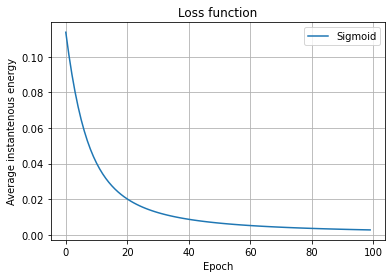

In [8]:
plt.plot(energias_promedio)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Average instantenous energy')
plt.title('Loss function')
plt.legend(['Sigmoid', 'Linear'])
plt.savefig('averageEnergy.jpeg', dpi=1200)

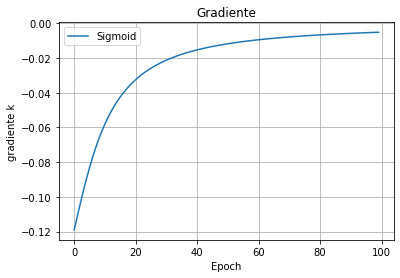

In [9]:
plt.plot(gradientes_k)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('gradiente k')
plt.title('Gradiente')
plt.legend(['Sigmoid'])
plt.savefig('averageEnergy.jpeg', dpi=1200)